# Threats Against US Government Officials

PPOL 5202 Final Project

Holt Cochran

In [ ]:
library(shiny)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'DT'

The following objects are masked from 'package:shiny':

    dataTableOutput, renderDataTable

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE


Attaching package: 'bslib'

The following object is masked from 'package:utils':

    page

New names:
• `` -> `...1`

New names:
• `` -> `...1`

Retrieving data for the year 2021

## Introduction

As political polarization has increased in the United States, so too has the intensity and malice of criticism against government officials. Amplified by recent events such as the 2020 presidential election and the COVID-19 pandemic, this escalation in scrutiny has expanded to all levels of government<sup>1</sup>. Government officials in lower-profile positions, once overlooked by the public, are now increasingly targets of public criticism and serious threats of harm, harrassment, violence, and death.

Given the surge in threats that local government officials face, my research objective is to examine characteristics, patterns, and trends of threats against local government officials in the United States. This research explores a concerning and escalating trend surrounding elected government officials. Local officials seldom have the protections or safety resources of higher-level officials, making them more vulnerable to these threats.

## Data Sources

The data in this analysis comes from the Bridging Divides Initiative (BDI) from Princeton University which publishes the Threats and Harassment Dataset (THD), a novel dataset that compiles information on instances of threats and harassment against local government officials into a single database (Bridging Divides Initiative, 2024). The data is reported monthly, starting in January 2022, and the most recently available data is from October 2024.

The dataset is at the event level, meaning the unit of analysis is an official instance of a serious threat or harassment against a local, elected, appointed, or municipal official. Threats can take many forms: common examples in the data are emails, social media messages, and phone calls. The data are observations of threats against elected officials, not the verbatim threats themselves; the variables include relevant information about the threat such as the position of the targeted official, the county and state in which the incident happened, and the date of the incident.

The focus of this analysis the “event summary” column in the data, which provides a summary of the incident with key information not contained elsewhere in the data. The text in the column is a police report-style summary of the threat made against the official.

Table 1 displays threat descriptions in the “event summary” column from the BDI dataset. The table allows for searches by keywords and filters by date of the threat.

#### Table 1

In [ ]:
# Create the interactive table
datatable(
  thd %>%
    select(DATE, EVENT.SUMMARY) %>%  # Keep only the necessary columns
    mutate(DATE = sub("T00:00:00Z$", "", DATE)),  # Remove the unwanted time part
  filter = "top",  # Add a filter option for each column
  options = list(
    pageLength = 5,  # Number of rows per page
    autoWidth = TRUE  # Adjust column widths automatically
  ),
  rownames = FALSE
)

## Exploratory Data Analysis (EDA)

Figure 1 displays the number of threats made against local officials over time. There is a clear, though uneven, increase in the number of threats, with a peak in July 2024. This underscores the escalating threats levied against local government officials.

#### Figure 1

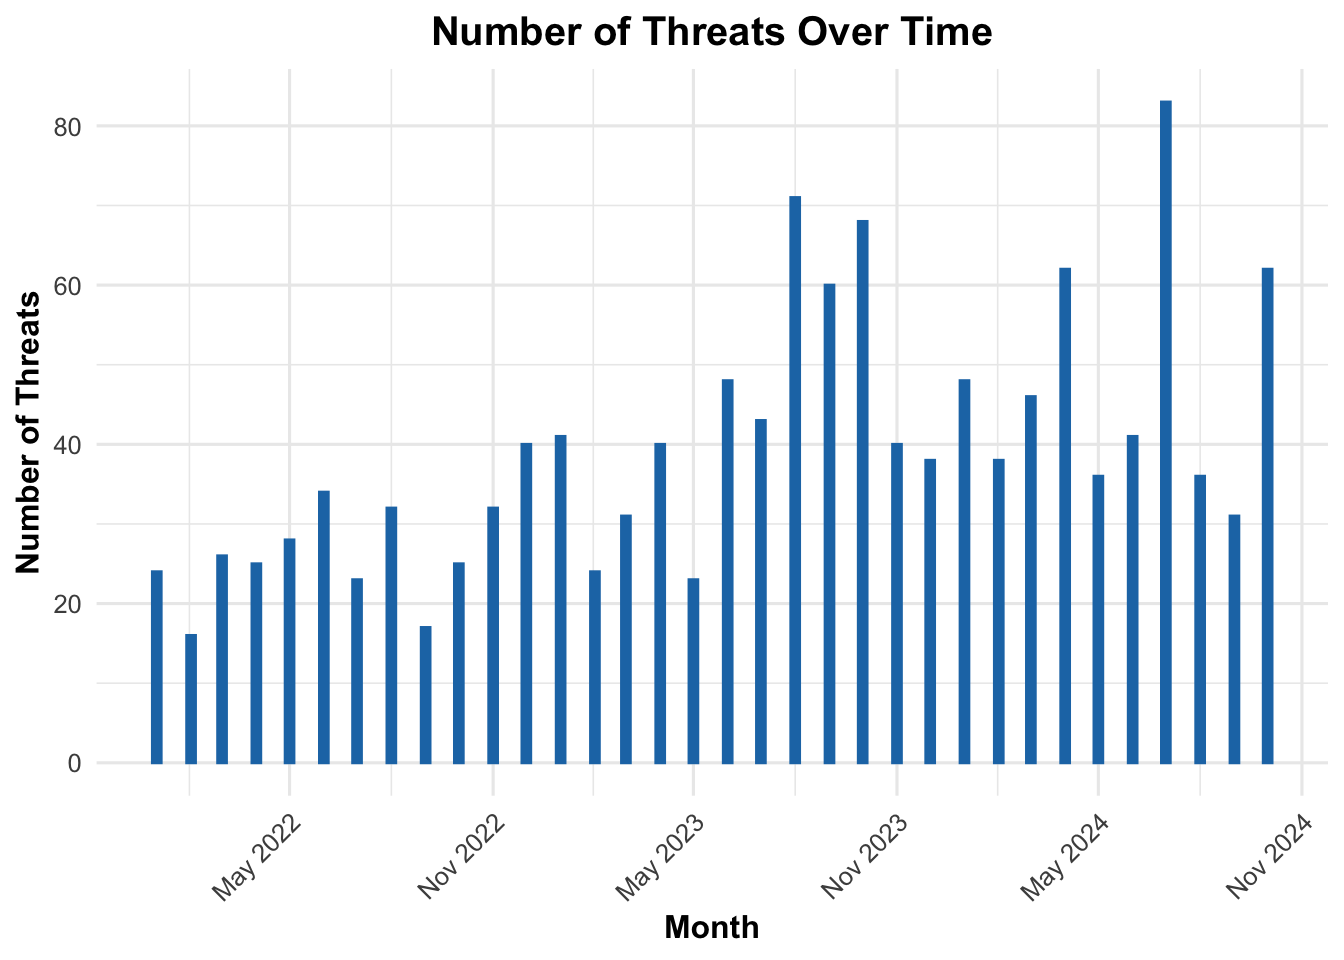

In [ ]:
events_per_month <- thd %>%
  mutate(month = format(DATE, "%Y-%m")) %>%  # Extract year-month
  group_by(month) %>%  # Group by month
  summarise(event_count = n(), .groups = 'drop') 


bar_chart <- ggplot(events_per_month, aes(x = as.Date(paste(month, "01", sep = "-")), y = event_count)) +
  geom_bar(stat = "identity", fill = "#1f77b4", color = "#1f77b4", width = 8) +  # Purple color and wider bars
  labs(title = "Number of Threats Over Time",
       x = "Month",
       y = "Number of Threats") +
  scale_x_date(date_labels = "%b %Y", date_breaks = "6 months") +  # Clean x-axis with formatted labels
  theme_minimal(base_size = 12) +  # Use minimal theme with a specified font size
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels for readability
    axis.title = element_text(face = "bold"),  # Bold axis titles for emphasis
    plot.title = element_text(hjust = 0.5, face = "bold", size = 15)  # Centered and bold title
  )

# Display the plot
bar_chart

## Top Words for States

For further exploratory data analysis, key words of threats within states are extracted and the threat locations are mapped. Figure 2 displays the top words of threat descriptions in states, as well as a map of states displaying county locations of the threats, shaded by the frequency of the threats.

By selecting a specific state, the top key words of the threats made within the state appear, as well as the geographic location of the threats at the county level. This allows for initial analysis into topics and geolocations of threats within specified states.

#### Figure 2

## Topic Modeling

To identify patterns within the threats against state and local government officials, a Latent Dirichlet Allocation (LDA) model is used to group words in the threat descriptions of the dataset. The model to divides the words into 5 categories, and then the top words for each category are identified. Table 2 displays the top 10 words for each topic - the topics have been renamed to reflect categories that the words fall into for more effectiveness.

#### Table 2

In [ ]:
library(gt)

Rows: 5 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Top_Words
dbl (1): Topic_Index

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

## Threat Prediction

After identifying topics within the threat summaries and grouping the threats into categories, I predict locations of threats across the United States. To do this, I build a random forest (rf) machine learning classifier model to predict the threat locations. I use the topic probabilities from the topic model, as well as geographic location of the threats and other descriptive features in the dataset (i.e. position of the official threatened), as input features to train the model. I then predict location of threats at the state level.

To evaluate the model, I analyze the model precision metric. Precision is appropriate for this analysis because it measures the true-positive rate of the model - in these methods, precision measures how often the model correctly predicted a threat’s geographic location. This is useful for analysis compared with overall model accuracy because accuracy would include predicting the absence of threats in states as well. As I am only focused on threats that actually happened, I focus on precision to identify how well the model does in predicting real threats.

Figure 3 displays the threat precision of the model at the state leave. States that are shaded darker orange/red have higher model precision. I interpret this to mean that these states have more identifiable patterns in threats against their officials - this is useful in model deployment to address and combat these threats.

Also displayed are the topic probabilities for each the threats of state, broken down by specific topic. The mean topic probabilities for each state are taken for each topic. The maps display the probability that the threats in each state can be grouped into the specified topic category. This is useful in assessing the sensitivity of states to certain topics identified in the model

Inputs for the map can focus on the precision of the entire model or topic probabilities. By selecting “topic probability” under map options, users can view the probability that threats in a state belong to a specific topic per topic identified in Table 2.

#### Figure 3

For a more centralized view of state topic probabilities and precision, a table of metrics is created. Table 3 displays the precision and topic probabilities for each state. By selecting a state in the dropdown menu, users can view the entire precision and topic probability metrics for a specific state. There is also an input function that allows for direct comparison of other states’ metrics for more effective and intuitive analysis between states.

#### Table 3

## Discussion

Identifiable patterns in the threat descriptions exist in the dataset, which can be applied more genearlly to state and nation-wide trends. Based on geographic distributions of topic probabilities in Figure 3, it is clear that certain states are more sensitive to specific topics than others. At a broader level, states with high precision metrics indicate that there are certain factors that can be used to predict instances of threats against government officials. As the frequency of these threats continue to increase, identifying patterns within the threats is an important step to raising awareness for the safety of the officials and combatting political violence.

Further analyses can be identified through state comparisons in Table 3, as well as further modeling of the threats themselves.

### References

> Kleinfeld, R. (2023, September 5). Polarization, Democracy, and Political Violence in the United States: What the Research Says. CarnegieEndowment.org. https://carnegieendowment.org/research/2023/09/polarization-democracy-and-political-violence-in-the-united-states-what-the-research-says?lang=en

### Dataset

> Bridging Divides Initiative - Empirical Studies of Conflict. (2024). Threats and Harassment Dataset. Princeton University. https://bridgingdivides.princeton.edu/research/understanding-threats-and-harassment-against-local-officials/dataset